# Домашня робота №7

# Перетворення випадкових величин

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Квантильне перетворення

### 1.1 Задана щільність

Нехай випадкова величина $\xi$ має щільність
$f(x) = a \sin(x) I_{[0, \pi]}(x),$
де $I_{[c, d]}(x)$ - індикатор на відрізку $[c, d]$.

Знайдіть значення параметра $a$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

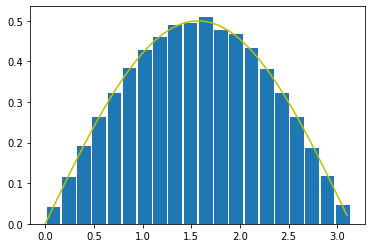

In [5]:
from scipy.stats import uniform as un

rv = un(0, 1)    
random = np.arccos(1 - 2*(rv.rvs(100_000)))
x = np.arange(0, np.pi, 0.1)

plt.hist(random, density=True, bins=20, rwidth=0.9)
plt.plot(x, 1/2 * np.sin(x), 'y')
plt.show()



### 1.2 Нормальний розподіл

Нехай випадкова величина $\xi \sim N(0, 1)$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

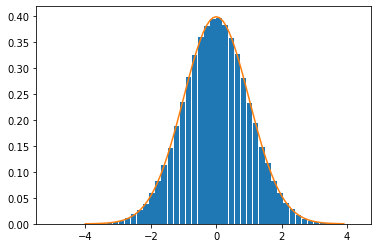

In [6]:
from scipy.stats import norm as nm

random = nm.ppf(un(0, 1).rvs(100_000))
x = np.arange(-4, 4, 0.1)

plt.hist(random, density=True, bins=50, rwidth=0.9)
plt.plot(x, nm.pdf(x))
plt.show()


## 2 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ з геометричного розподілу з параметром $p = 0.5$.
Тобто $\xi \sim Geom(0.5)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію ймовірностей випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) > 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих значень випадкової величини $\eta$;
   - функцію ймовірностей випадкової величини $\xi$.

**Зауваження 1.** Графік функції ймовірнстей краще малювати для $10$ значень.

**Зауваження 2.** У гістограмах проміжок значень слід розбивати на одиничні інтервали.

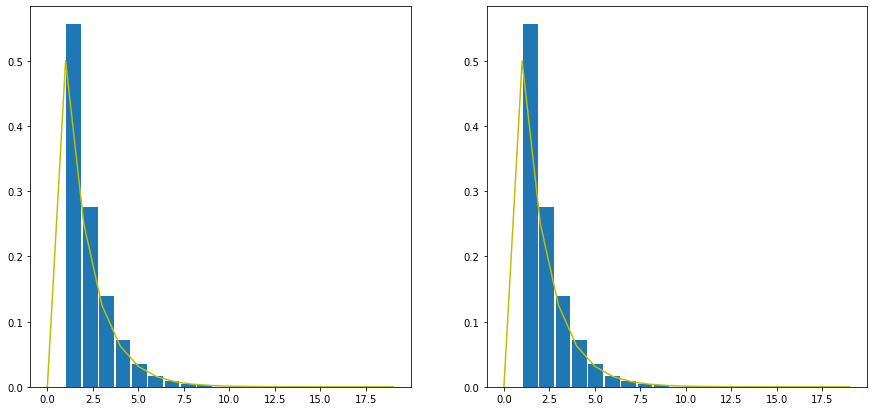

In [13]:
from scipy.stats import geom as gm

def func1(x):
    result = x - 1
    if getattr(result, '__iter__', None) is not None:
        for i, el in enumerate(result):
            if el < 0:
                result[i] = 0
    else:
        if result < 0:
            result = 0 
    return result

randomArr = gm(0.5).rvs(100_000)
x = np.arange(0, 20, 1)
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].hist(randomArr, bins=20, density=True, rwidth=0.9)
axs[0].plot(x, gm(0.5).pmf(x), 'y')
randResult = func1(randomArr)
axs[1].hist(randomArr, bins=20, density=True, rwidth=0.9)
axs[1].plot(x, gm(0.5).pmf(x), 'y')


## 3 Задача 1.11.3

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

### 3.1 Експонента

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \exp\{-\xi\}$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

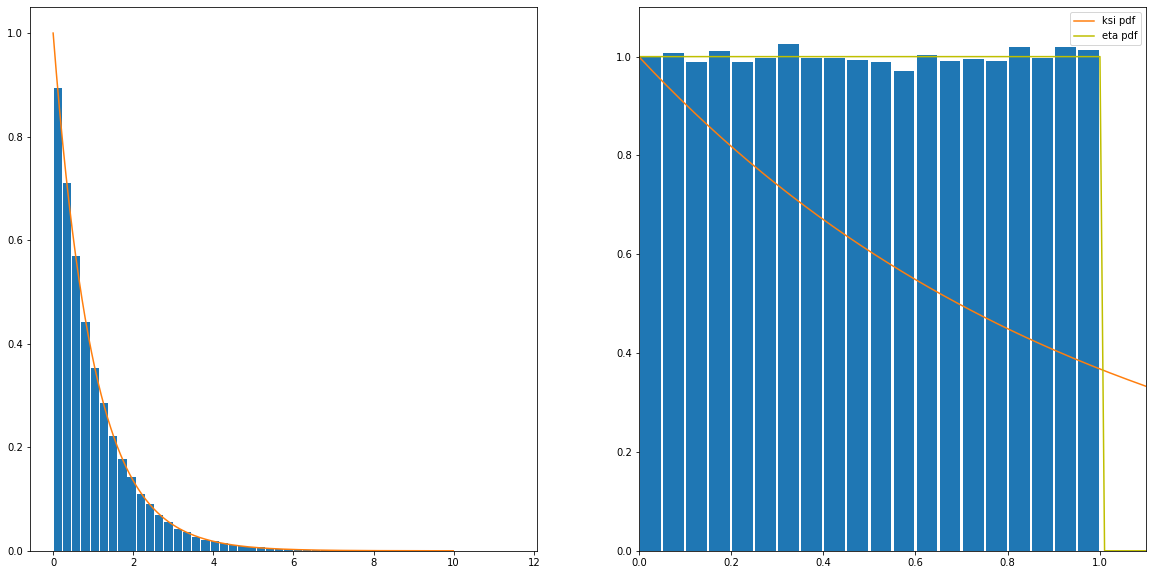

In [17]:
from scipy.stats import expon as exp
from scipy.stats import uniform as un

varRvs = exp.rvs(0, size=100000)
x = np.arange(0, 10, 0.01)
fig, axs = plt.subplots(1, 2,figsize=[20,10])
axs[0].hist(varRvs, bins=50, density=True, rwidth=0.9)
axs[0].plot(x, exp(0).pdf(x))

ths = lambda x: np.exp(-x)
y_ths = un.pdf(x)
axs[1].hist(un(0,1).rvs(100000), bins=20, density=True, label="", rwidth=0.9)
axs[1].plot(x, exp(0).pdf(x), label = "ksi pdf")
axs[1].plot(x, y_ths, 'y', label = "eta pdf")
axs[1].set_xlim([0,1.1])
axs[1].set_ylim([0,1.1])
plt.legend()
plt.show()


### 3.2 Квадрат

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \xi^2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

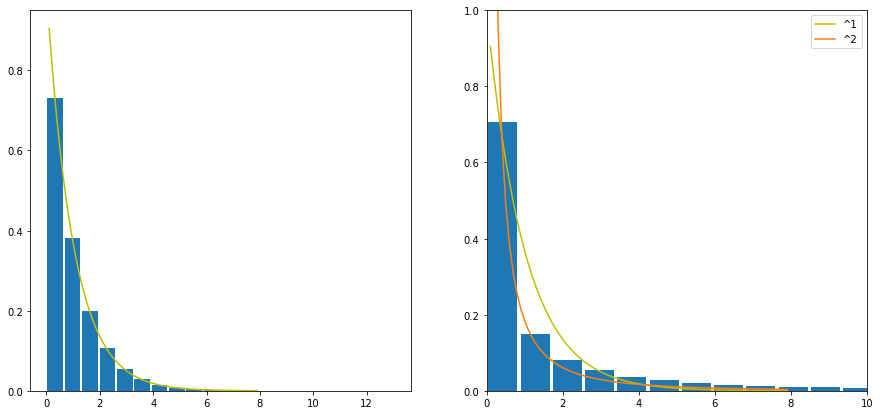

In [19]:
rv = exp()

randomList = rv.rvs(100_000)
x = np.arange(0.1, 8, 0.1)

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].hist(randomList, bins=20, density=True, rwidth=0.9)
axs[0].plot(x, rv.pdf(x), 'y')
axs[1].hist(randomList ** 2, bins=200, density=True, rwidth=0.9)
axs[1].plot(x, rv.pdf(x), 'y', label='^1')
axs[1].plot(x, np.exp(-np.sqrt(x)) / (2 * x), label='^2')
axs[1].set_ylim(0, 1)
axs[1].set_xlim(0, 10)
plt.legend()
plt.show()


## 4 Задача 1.11.5

Розглянемо випадкову величину $\xi$ зі стандартного рівномірного розподілу.
Тобто $\xi \sim Unif(0, 1)$.

### 4.1 Лінійне перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = 3 \xi - 2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

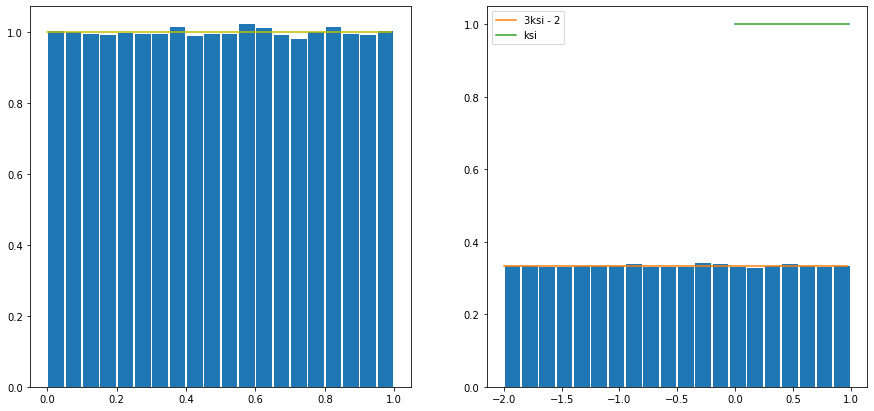

In [20]:
rv = un(0, 1)

randomList = rv.rvs(100_000)
x = np.arange(0, 1, 0.01)

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].hist(randomList, bins=20, density=True, rwidth=0.9)
axs[0].plot(x, rv.pdf(x), 'y')
axs[1].hist(3*randomList - 2, bins=20, density=True, rwidth=0.9)
axs[1].plot(3*x - 2, rv.pdf((x + 2) / 3) / 3, label='3ksi - 2')
axs[1].plot(x, rv.pdf(x), label='ksi')
plt.legend()
plt.show()


### 4.2 Модуль від лінійного перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = |2 \xi - 1|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

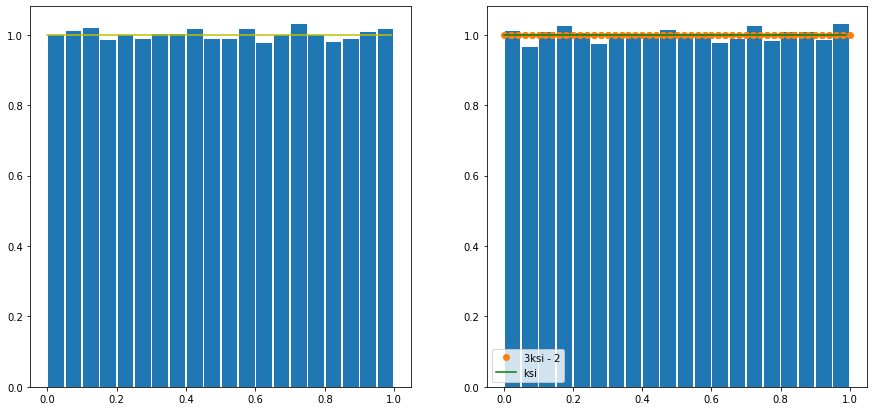

In [23]:
rv = un(0, 1)
randomList = rv.rvs(100_000)
x = np.arange(0, 1, 0.01)

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].hist(randomList, bins=20, density=True, rwidth=0.9)
axs[0].plot(x, rv.pdf(x), 'y')
axs[1].hist(np.abs(2*randomList - 1), bins=20, density=True, rwidth=0.9)
axs[1].plot(np.abs(2*x - 1), rv.pdf((x + 1) / 2) + rv.pdf(-(x + 1) / 2), 'o', label='3ksi - 2')
axs[1].plot(x, rv.pdf(x), 'g', label='ksi')
plt.legend()
plt.show()


### 4.3 Логарифм

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = - \log \xi$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

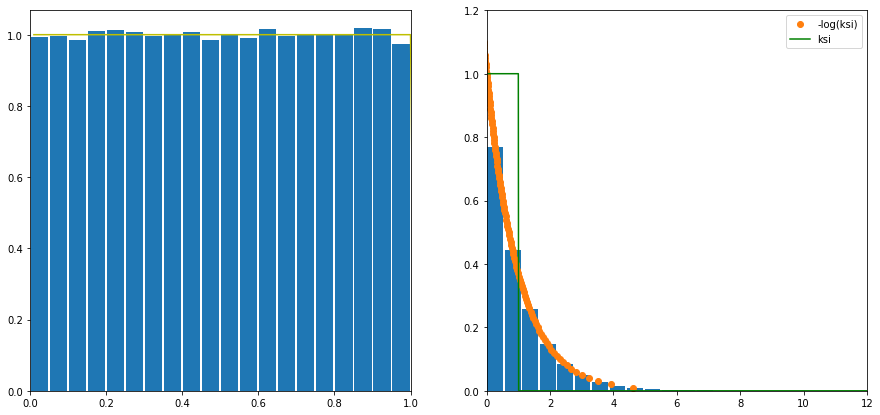

In [24]:
rv = un(0, 1)
random = rv.rvs(100_000)
x = np.arange(0.01, 12, 0.01)

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].hist(random, bins=20, density=True, rwidth=0.9)
axs[0].plot(x, rv.pdf(x), 'y')
axs[0].set_xlim(0, 1)
axs[1].hist(-np.log(random), bins=20, density=True, rwidth=0.9)
axs[1].plot(-np.log(x), x * rv.pdf(np.exp(-x)), 'o', label='-log(ksi)')
axs[1].plot(x, rv.pdf(x), 'g', label='ksi')
axs[1].set_xlim(0, 12)
axs[1].set_ylim(0, 1.2)
plt.legend()
plt.show()


## 5 Одиничний квадрат

Реалізуйте вадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

In [26]:
fnc = (un(0, 1), un(0, 1))


Знайдіть функцію щільності випадкової величини $\xi_1 = x^2 + y^2$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_1$,
отриманою перетвореннями випадкових величин $x, y$.

Знайдіть функцію щільності випадкової величини $\xi_2 = \max (x, y)$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_2$,
отриманою перетвореннями випадкових величин $x, y$.

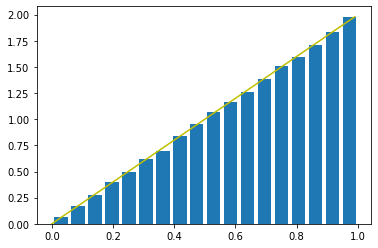

In [27]:
random = np.array([max(a, b) for a, b in zip(un.rvs(0, 1, 100_000), un.rvs(0, 1, 100_000))])
x = np.arange(0, 1, 0.01)

plt.hist(random, bins=18, density=True, rwidth=0.8)
plt.plot(x, 2*x, 'y')
plt.show()

Знайдіть функцію щільності випадкової величини $\xi_3 = |x - y|$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_3$,
отриманою перетвореннями випадкових величин $x, y$.

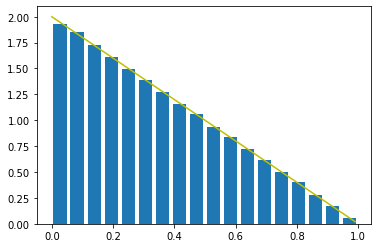

In [28]:
random = np.array([abs(a - b) for a, b in zip(un.rvs(0, 1, 100_000), un.rvs(0, 1, 100_000))])
x = np.arange(0, 1, 0.01)

plt.hist(random, bins=18, density=True, rwidth=0.8)
plt.plot(x, 2 - 2*x, 'y')
plt.show()